# Real-Time Traffic Object Recognition using YOLOv8

This project focuses on object detection in street view scenes, identifying common objects such as cars, pedestrians, bicycles, and traffic lights. Object detection is a critical task in computer vision, with applications in autonomous driving, traffic monitoring, and urban planning. By accurately detecting and localizing objects in images and videos, we can better understand and analyze complex street environments.

## Why It Matters
Street view object detection is essential for improving road safety, optimizing traffic flow, and enabling autonomous vehicles to navigate safely. Detecting and tracking objects like cars and pedestrians in real-time helps systems make informed decisions, such as avoiding collisions or adjusting traffic signals. This project demonstrates how modern object detection models can be applied to real-world scenarios.

## About YOLOv8
YOLOv8 (You Only Look Once version 8) is a state-of-the-art object detection model known for its speed and accuracy. It processes images and videos in real-time, making it ideal for applications requiring quick and reliable detection. YOLOv8 can detect multiple objects in a single pass, providing bounding boxes, class labels, and confidence scores for each detected object.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Clone YOLOv8 repository
!git clone https://github.com/ultralytics/ultralytics
%cd ultralytics

In [ ]:
from ultralytics import YOLO
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, Video, display, clear_output
from PIL import Image as pilimg
import os

In [ ]:
# Load a pre-trained YOLOv8 model
model = YOLO("yolov8s.pt")

In [ ]:
%cd -

/content


## Inference on Images

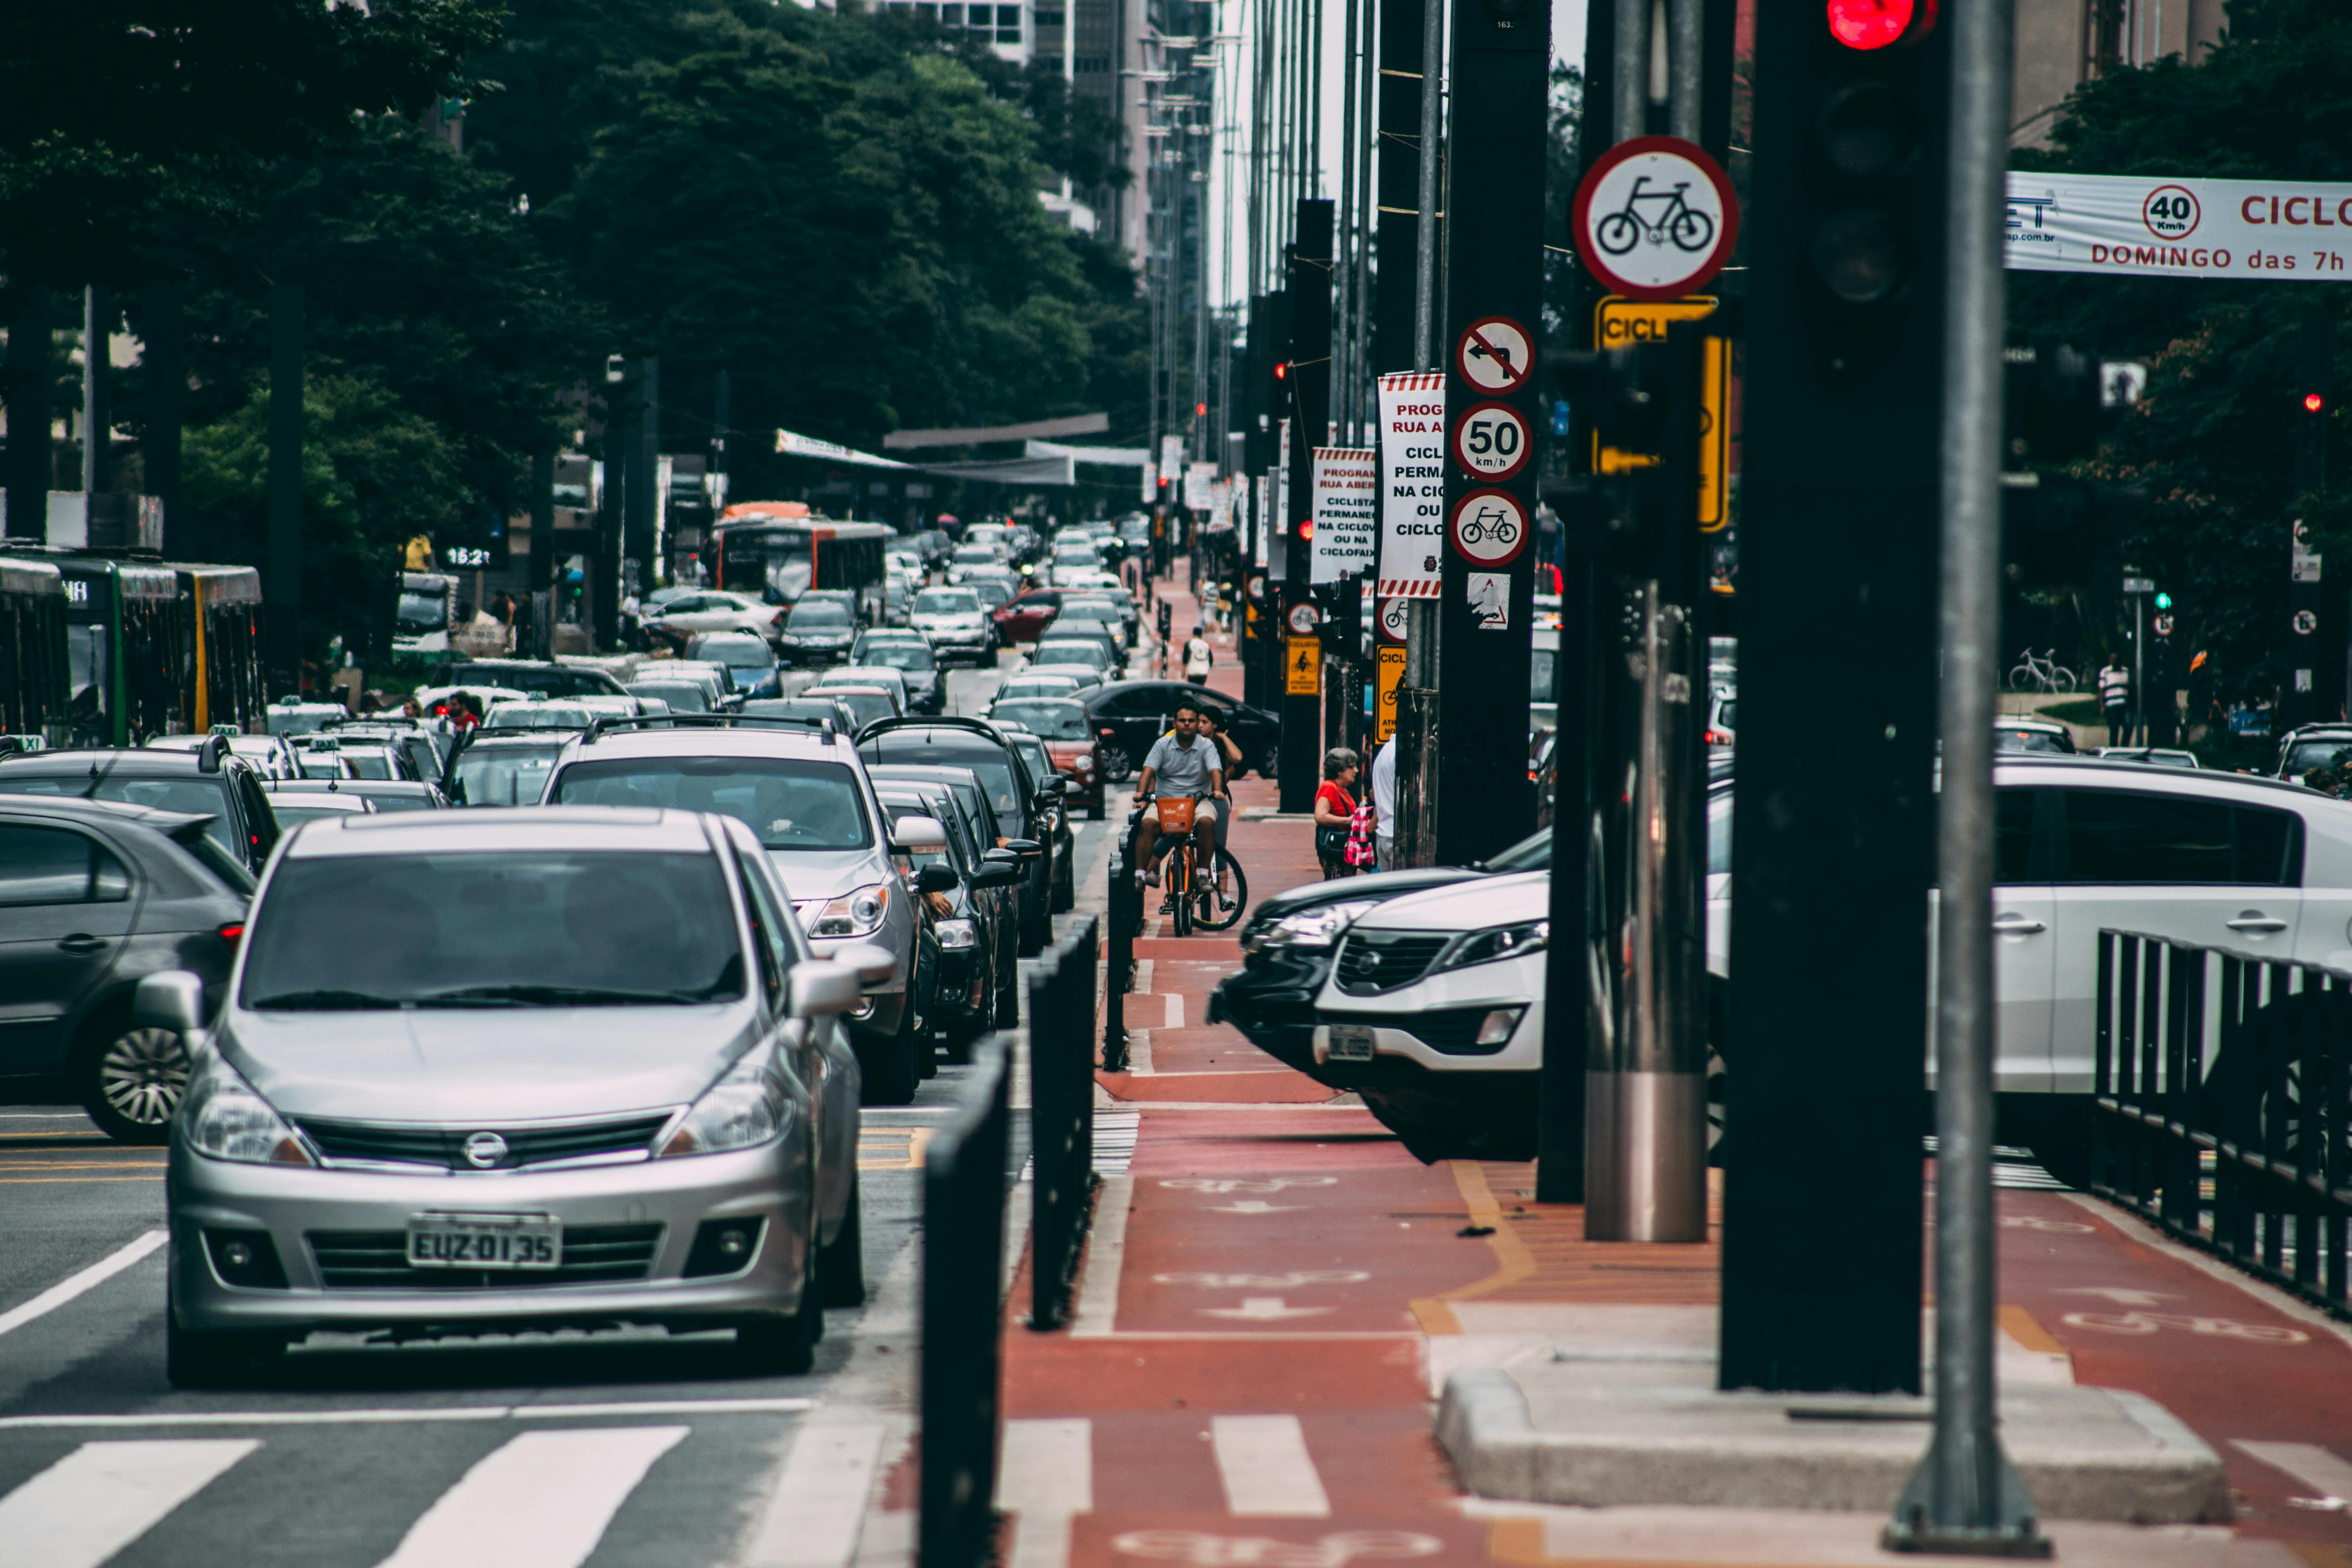

In [ ]:
# Path to the image
image_path = "/content/drive/MyDrive/traffic_monitoring_data/pexels-hikaique-39943.jpg"

# Display the image
Image(filename=image_path)

Photo by Kaique Rocha: https://www.pexels.com/photo/parked-gray-car-39943/

In [ ]:
# Perform inference on the uploaded image
results = model(image_path)


image 1/1 /content/drive/MyDrive/traffic_monitoring_data/pexels-hikaique-39943.jpg: 448x640 3 persons, 1 bicycle, 16 cars, 2 buss, 1 traffic light, 61.4ms
Speed: 17.6ms preprocess, 61.4ms inference, 384.3ms postprocess per image at shape (1, 3, 448, 640)


In [ ]:
# Create a folder to save output frames and video
output_folder = 'output_images'
os.makedirs(output_folder, exist_ok=True)

In [ ]:
# Save the results
for result in results:
    plotted_image = result.plot()  # Returns a numpy array (BGR format)
    plotted_image_rgb = cv2.cvtColor(plotted_image, cv2.COLOR_BGR2RGB)
    output_image_path = 'output_images/output_image1.jpg'
    cv2.imwrite(output_image_path, plotted_image)
    print(f"Saved output image to {output_image_path}")

Saved output image to output_images/output_image1.jpg


In [ ]:
# Print the detection results in tabular form (bounding boxes, labels, confidence scores)
for result in results:
    # Access bounding boxes, confidence scores, and class labels
    boxes = result.boxes.xyxy  # Bounding boxes in [x1, y1, x2, y2] format
    confidences = result.boxes.conf  # Confidence scores
    class_ids = result.boxes.cls  # Class IDs
    class_names = result.names  # Class names mapping

    # Loop through the results to display individual object details
    for i in range(len(boxes)):
        x1, y1, x2, y2 = boxes[i].tolist()
        confidence = confidences[i].item()
        class_id = int(class_ids[i].item())
        class_name = class_names[class_id]

        print(f"Object {i}: {class_name} detected with confidence {confidence:.2f} "
              f"at [x1={x1:.2f}, y1={y1:.2f}, x2={x2:.2f}, y2={y2:.2f}]")

Object 0: car detected with confidence 0.91 at [x1=351.09, y1=1755.27, x2=1964.28, y2=3042.11]
Object 1: car detected with confidence 0.88 at [x1=1.74, y1=1740.73, x2=549.78, y2=2506.25]
Object 2: car detected with confidence 0.73 at [x1=1185.45, y1=1586.70, x2=2051.01, y2=2407.09]
Object 3: person detected with confidence 0.73 at [x1=2482.80, y1=1537.54, x2=2710.65, y2=1955.40]
Object 4: car detected with confidence 0.61 at [x1=1887.58, y1=1597.33, x2=2351.59, y2=2091.87]
Object 5: bus detected with confidence 0.58 at [x1=2.86, y1=1207.17, x2=577.16, y2=1649.94]
Object 6: bus detected with confidence 0.52 at [x1=1563.67, y1=1095.38, x2=1963.08, y2=1345.13]
Object 7: person detected with confidence 0.52 at [x1=2883.57, y1=1644.70, x2=3011.57, y2=1931.95]
Object 8: car detected with confidence 0.51 at [x1=5003.69, y1=1584.52, x2=5164.27, y2=1744.42]
Object 9: bicycle detected with confidence 0.50 at [x1=2505.47, y1=1733.74, x2=2733.43, y2=2049.09]
Object 10: car detected with confidence

These results demonstrate the model's ability to accurately detect and classify multiple objects in a static street view image. Using YOLOv8, the model identifies and localizes objects such as cars, bicycles, and pedestrians. For example:

- A car was detected with 91% confidence at coordinates [x1=351.09, y1=1755.27, x2=1964.28, y2=3042.10].
- A person was detected with 73% confidence at [x1=2482.80, y1=1537.54, x2=2710.65, y2=1955.40].
- A bus was detected with 58% confidence at [x1=2.86, y1=1207.17, x2=577.16, y2=1649.94].

## Inference on Video

In [ ]:
# Open video file
video_path = '/content/drive/MyDrive/traffic_monitoring_data/13308165-hd_1920_1080_50fps.mp4'
cap = cv2.VideoCapture(video_path)

In [ ]:
# Display the video
video_url = 'https://videos.pexels.com/video-files/13308165/13308165-hd_1920_1080_50fps.mp4'
Video(video_url)

Video by Levi Wedge: https://www.pexels.com/video/people-walking-on-the-street-while-crossing-the-pedestrian-13308165/

In [ ]:
# Create a folder to save output frames and video
output_folder = 'output_videos'
os.makedirs(output_folder, exist_ok=True)

In [ ]:
# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

In [ ]:
# Initialize video writer to save the output video
output_video_path = os.path.join(output_folder, 'output_video1.mp4')
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for .mp4
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

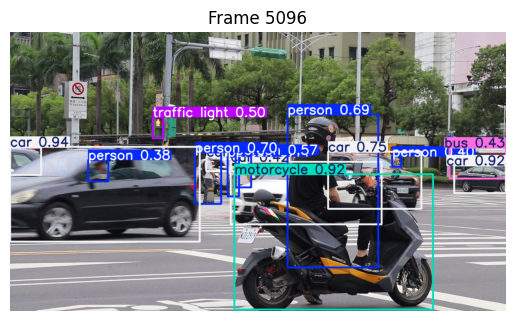

Processed Frame 5096
Video processing complete. Output saved to 'output_videos/output_video1.mp4'.


In [ ]:
# Frame count for reference
frame_count = 0

# List to store detection details for all frames
all_detections = []

# Loop through video frames
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1  # Keep track of the frame number

    # Run YOLOv8 inference on the frame
    results = model(frame)

    # Process results for each frame
    for result in results:
        # Get the frame with bounding boxes and labels
        plotted_frame = result.plot()  # Returns a numpy array (BGR format)

        # Write the frame to the output video
        out.write(plotted_frame)

        # Convert BGR to RGB for matplotlib display
        plotted_frame_rgb = cv2.cvtColor(plotted_frame, cv2.COLOR_BGR2RGB)

        # Display the frame in Jupyter
        clear_output(wait=True)  # Clear previous output
        plt.imshow(plotted_frame_rgb)
        plt.axis('off')  # Hide axes
        plt.title(f"Frame {frame_count}")
        plt.show()

        # Access bounding boxes, confidence scores, and class labels
        boxes = result.boxes.xyxy  # Bounding boxes in [x1, y1, x2, y2] format
        confidences = result.boxes.conf  # Confidence scores
        class_ids = result.boxes.cls  # Class IDs
        class_names = result.names  # Class names mapping

        # Store detection details for this frame
        frame_detections = []
        for i in range(len(boxes)):
            x1, y1, x2, y2 = boxes[i].tolist()
            confidence = confidences[i].item()
            class_id = int(class_ids[i].item())
            class_name = class_names[class_id]

            frame_detections.append({
                'object_id': i,
                'class_name': class_name,
                'confidence': confidence,
                'bbox': [x1, y1, x2, y2]
            })

        # Add frame detections to the list
        all_detections.append({
            'frame_number': frame_count,
            'detections': frame_detections
        })

    # Print frame information
    print(f"Processed Frame {frame_count}")

# Release the video capture and writer objects
cap.release()
out.release()

# Print completion message
print(f"Video processing complete. Output saved to '{output_video_path}'.")

The video inference showcased YOLOv8's ability to maintain consistent performance across frames, making it suitable for real-time applications. The model detected objects in real-time, providing bounding boxes and confidence scores for each frame. For example:

- In Frame 1, 29 objects were detected, including cars, motorcycles, pedestrians, and traffic lights.
- A motorcycle was detected with a confidence score of 0.79 at coordinates [x1=1742.96, y1=544.16, x2=1907.77, y2=677.25].
- A person was detected with a confidence score of 0.75 at coordinates [x1=847.34, y1=464.88, x2=920.04, y2=714.17].

## Conclusion
The results highlight the effectiveness of YOLOv8 in detecting and localizing objects in both images and videos. The model achieves high confidence scores for most detections, demonstrating its reliability in complex street scenes. In the video analysis, the model successfully tracks objects across frames, providing consistent and accurate detections. This capability is crucial for real-time applications like autonomous driving, where understanding the movement of objects is as important as detecting them. While the results are promising, further improvements can be made to enhance the detection of smaller or less common objects. Overall, this work demonstrates the potential of computer vision technologies to transform how we analyze and interact with our surroundings.

In [ ]:
# Print final information about all frames
print("\nFinal Detection Summary for All Frames:")
for frame_info in all_detections:
    frame_number = frame_info['frame_number']
    detections = frame_info['detections']
    print(f"\nFrame {frame_number}: {len(detections)} objects detected")
    for detection in detections:
        print(f"  Object {detection['object_id']}: {detection['class_name']} "
              f"detected with confidence {detection['confidence']:.2f} "
              f"at bbox {detection['bbox']}")

Streaming output truncated to the last 5000 lines.
  Object 20: person detected with confidence 0.38 at bbox [485.1142272949219, 475.5623779296875, 528.6636962890625, 631.06005859375]
  Object 21: person detected with confidence 0.30 at bbox [474.7012939453125, 472.0751037597656, 530.1253051757812, 664.0438232421875]
  Object 22: traffic light detected with confidence 0.26 at bbox [609.775634765625, 326.00946044921875, 645.6553344726562, 410.99664306640625]
  Object 23: person detected with confidence 0.26 at bbox [269.6763916015625, 448.74810791015625, 331.0255126953125, 681.48193359375]

Frame 4880: 22 objects detected
  Object 0: car detected with confidence 0.90 at bbox [1706.560546875, 513.00390625, 1919.520263671875, 624.608154296875]
  Object 1: car detected with confidence 0.89 at bbox [0.5109100341796875, 444.5870361328125, 203.45150756835938, 742.6019897460938]
  Object 2: motorcycle detected with confidence 0.89 at bbox [871.9969482421875, 561.1639404296875, 1641.28491210937